## Practicing real world examples


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Get the Dataset


In [125]:
cars = pd.read_csv('./mtcars.csv') # load the dataset

2. Look at the Data Structure


In [126]:
cars.head() # Quick look of dataset

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [127]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [128]:
cars['model'].value_counts().head()

model
Mazda RX4            1
Mazda RX4 Wag        1
Datsun 710           1
Hornet 4 Drive       1
Hornet Sportabout    1
Name: count, dtype: int64

In [129]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


3. Create two sets of Dataset

- Training set
- Testing set


Method 1:
Making it manually


In [130]:
def split_dataset(df:pd.DataFrame, ratio:float, seed:int=42):
    
    np.random.seed(seed)  # 👈 Set seed here

    shuffle_indices = np.random.permutation(len(df)) # shuffle the dataset [31,3,5,...]
    text_set_size = int(len(df) * ratio) # returns 32 * 0.2 = 6.2 => 6 

    test_indices = shuffle_indices[:text_set_size] # [0,1,2,3,4,5]
    train_indices = shuffle_indices[text_set_size:] # [6,7,8,9,10,...31]

    return df.iloc[train_indices], df.iloc[test_indices]

In [131]:
train_set, test_set = split_dataset(cars, 0.2)


Method 2: Making it through SK learn


In [132]:
from sklearn.model_selection import train_test_split

sk_learn_tain_set, sk_learn_test_set = train_test_split(cars, test_size=0.2, random_state=42)
sk_learn_tain_set.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


Method 3: By using pandas


In [133]:
pd_train_set = cars.sample(frac=0.8, random_state=42)
pd_test_set = cars.drop(pd_train_set.index)
pd_train_set.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


Making Startified Sampling


In [ ]:
# pd.cut(): This is a Pandas function used to divide a continuous variable into intervals (bins).
# Create stratified sampling groups (as you saw earlier).
cars['hp'] = pd.cut(cars['hp'], 
                    bins= [0,70,140, 210, 280, 350, np.inf],
                    labels=['low', 'medium_low', 'medium', 'medium_high', 'high', 'very_high']
                    )





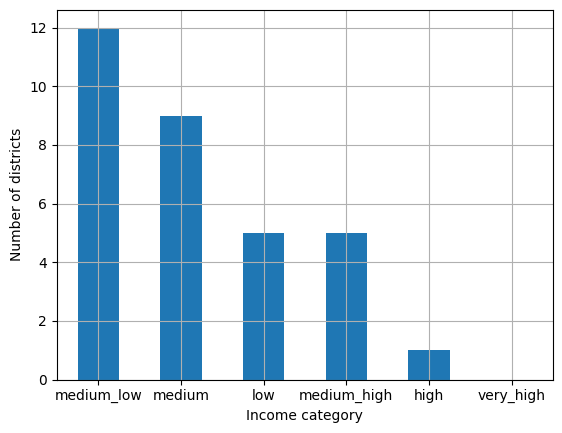

In [135]:
cars['hp'].value_counts().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()